<a href="https://colab.research.google.com/github/thevirusoup/thevirusoup/blob/main/Tanzil_NGS_2_GWAS_beginner_guide.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#What is GWAS (Genome-Wide Association Study)?

Think of GWAS as a giant DNA treasure hunt! It's like comparing thousands of people's DNA to find special spots that might be linked to specific traits or diseases.

Imagine you have two groups of people:

*   One group has a particular trait (like blue eyes) or a disease (like diabetes)
*   Another group doesn't have that trait or disease

GWAS is like playing "spot the difference" between these groups' DNA to find what makes them different.

Key points to understand GWAS:
  - Our DNA is like a very long book with 3 billion letters (called bases)
  - Sometimes these letters can have variations (called SNPs - pronounced "snips")
  - GWAS looks at millions of these variations across many people to find which ones are related to specific traits

A simple analogy:
  - Think of DNA as a huge library with 23 pairs of books (chromosomes)
  - Each book has millions of sentences (genes)
  - GWAS is like having two groups of people with different libraries
  - Scientists check each sentence to see which differences in the books (genetic variations) might be responsible for different traits

Real-world example:
  - Let's say we want to understand why some people are taller than others
  - GWAS would compare the DNA of many tall people with that of people of average height
  - If certain DNA variations appear more often in tall people, these might be linked to height

What makes GWAS special:
  - It looks at the whole DNA (genome) at once
  - It doesn't need to know beforehand which genes might be important
  - It can find unexpected connections between genes and traits
  - It's like having a powerful microscope that can look at millions of DNA differences simultaneously


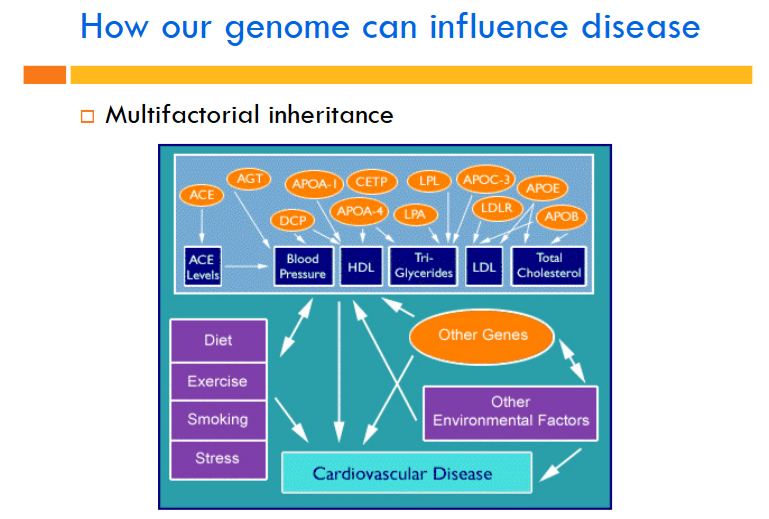

Two approaches to association studies:
*   Candidate gene approach
*   Genome-wide approach

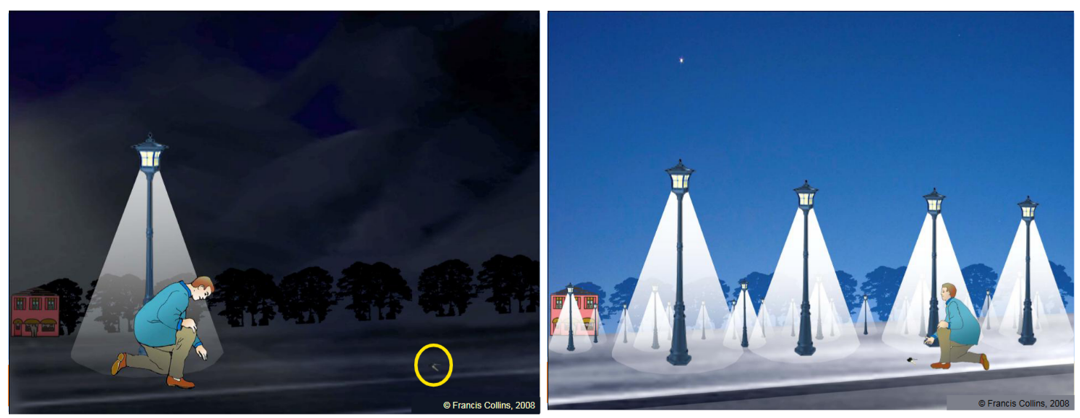

The Basic GWAS Model:

CopyY = β₀ + β₁X + e

Where:

Y = Trait/Disease (what we're studying)

β₀ = Baseline effect (intercept)

β₁ = Effect size of the genetic variant

X = Genetic variant (coded as 0,1,2 for the number of effect alleles)

e = Random error

Study more from Dr. Ravikumar Gandham Sir: https://youtu.be/MXIXJLGv7Ww?si=QcDRFZaaAWi8_Pv4

lh ISNDIWNdi: [IIAB](https://iiab.icar.gov.in/)

In [ ]:
#@title Install Required Packages
!pip install pandas numpy matplotlib seaborn scipy statsmodels

In [1]:
#@title Upload your data {display-mode: "form"}
from google.colab import files
uploaded = files.upload()

Saving cattle_2024-12-26_53599variants_24samples_PLINK.zip to cattle_2024-12-26_53599variants_24samples_PLINK.zip


In [2]:
!unzip cattle_2024-12-26_53599variants_24samples_PLINK.zip

Archive:  cattle_2024-12-26_53599variants_24samples_PLINK.zip
  inflating: licensed_data.txt       
  inflating: selection.txt           
  inflating: marker_ID_info.txt      
  inflating: cattle__53599variants__24individuals.ped  
  inflating: cattle__53599variants__24individuals.map  


In [ ]:
#@title Install GCTA tool
!wget https://yanglab.westlake.edu.cn/software/gcta/bin/gcta-1.94.3-linux-kernel-3-x86_64.zip
!unzip -j gcta-1.94.3-linux-kernel-3-x86_64.zip "*/gcta64"
!chmod +x gcta64
!sudo mv gcta64 /usr/local/bin/

In [4]:
#@title Install PLINK
!wget https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20201019.zip
!unzip plink_linux_x86_64_20201019.zip

--2024-12-26 05:21:18--  https://s3.amazonaws.com/plink1-assets/plink_linux_x86_64_20201019.zip
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.18.166, 52.217.140.240, 52.216.187.61, ...
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.18.166|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8916695 (8.5M) [application/zip]
Saving to: ‘plink_linux_x86_64_20201019.zip’

plink_linux_x86_64_ 100%[===================>]   8.50M  32.2MB/s    in 0.3s    

2024-12-26 05:21:18 (32.2 MB/s) - ‘plink_linux_x86_64_20201019.zip’ saved [8916695/8916695]

Archive:  plink_linux_x86_64_20201019.zip
  inflating: plink                   
  inflating: LICENSE                 
  inflating: toy.ped                 
  inflating: toy.map                 
  inflating: prettify                


In [6]:
#@title Convert PED/MAP to Binary Format
!./plink --cow --file cattle__53599variants__24individuals --make-bed --out hapmap1_binary

PLINK v1.90b6.21 64-bit (19 Oct 2020)          www.cog-genomics.org/plink/1.9/
(C) 2005-2020 Shaun Purcell, Christopher Chang   GNU General Public License v3
Logging to hapmap1_binary.log.
Options in effect:
  --cow
  --file cattle__53599variants__24individuals
  --make-bed
  --out hapmap1_binary

12978 MB RAM detected; reserving 6489 MB for main workspace.
.ped scan complete (for binary autoconversion).
Performing single-pass .bed write (53599 variants, 24 cattle).
--file: hapmap1_binary-temporary.bed + hapmap1_binary-temporary.bim +
hapmap1_binary-temporary.fam written.
53599 variants loaded from .bim file.
24 cattle (0 males, 0 females, 24 ambiguous) loaded from .fam.
Ambiguous sex IDs written to hapmap1_binary.nosex .
Using 1 thread (no multithreaded calculations invoked).
Before main variant filters, 24 founders and 0 nonfounders present.
Calculating allele frequencies... 0%1%2%3%4%5%6%7%8%9%10%11%12%13%14%15%16%17%18%19%20%21%

In [ ]:
#@title Run Quality Control
!./plink --bfile hapmap1_binary \
    --maf 0.01 \
    --geno 0.05 \
    --hwe 1e-6 \
    --make-bed \
    --out hapmap1_qc

In [ ]:
#@title Calculate GRM
!gcta64 --bfile hapmap1_qc \
    --autosome \
    --make-grm \
    --out hapmap1_grm \
    --thread-num 4

In [ ]:
#@title Calculate PCs
!gcta64 --grm hapmap1_grm \
    --pca 20 \
    --out hapmap1_pca \
    --thread-num 4

In [ ]:
#@title Run GWAS
!gcta64 --mlma-loco \
    --bfile hapmap1_qc \
    --pheno cancer.txt \
    --mpheno 1 \
    --grm hapmap1_grm \
    --qcovar hapmap1_pca.eigenvec \
    --out hapmap1_gwas \
    --thread-num 4 \
    --prevalence 0.1

Visualization

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# Read GCTA results
gwas_results = pd.read_csv('hapmap1_gwas.loco.mlma', delim_whitespace=True)

In [ ]:
# Calculate genomic inflation factor (λ)
chi2_obs = stats.chi2.ppf(1 - gwas_results['p'], 1)
lambda_gc = np.median(chi2_obs) / stats.chi2.ppf(0.5, 1)
print(f"\nGenomic inflation factor (λ): {lambda_gc:.3f}")

Manhattan Plot

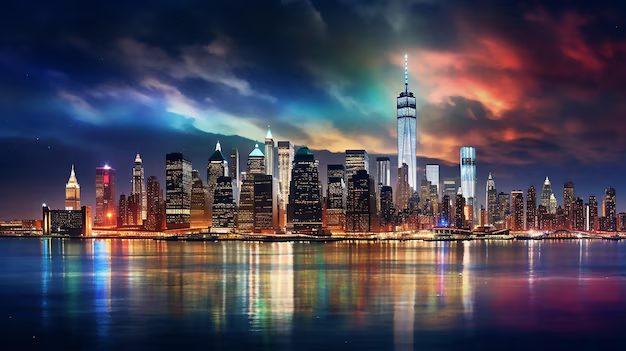

In [ ]:
# Calculate cumulative positions for Manhattan plot
gwas_results['BP_cum'] = gwas_results['bp'].copy()
chrom_df = gwas_results.groupby('Chr')['bp'].max()
last_bp = 0

for chrom in sorted(gwas_results['Chr'].unique()):
    mask = gwas_results['Chr'] == chrom
    if chrom > 1:
        last_bp += chrom_df[chrom-1]
    gwas_results.loc[mask, 'BP_cum'] = gwas_results.loc[mask, 'bp'] + last_bp

# Get chromosome center positions for labels
chrom_centers = gwas_results.groupby('Chr')['BP_cum'].mean()

In [ ]:
# Create Manhattan plot
plt.figure(figsize=(18, 8))

# Define colors for chromosomes - bright and visually distinct
colors = ['#0343DF', '#FFE733', '#1FB714', '#929292', '#87CEEB',
          '#7B4DA6', '#F6A600', '#FF69B4', '#ED1C24', '#97CC04',
          '#B8860B', '#000000', '#FFC0CB', '#4169E1', '#8B4513',
          '#008080', '#40E0D0', '#8A2BE2', '#006400', '#4B0082',
          '#800000', '#483D8B']

# Initialize empty lists for positions and colors
plot_positions = []
plot_colors = []
plot_sizes = []
chr_labels = []

# Process each chromosome
last_pos = 0
for i, chrom in enumerate(sorted(gwas_results['Chr'].unique())):
    # Get data for this chromosome
    chr_data = gwas_results[gwas_results['Chr'] == chrom]

    # Add positions
    positions = chr_data['bp'] + last_pos
    plot_positions.extend(positions)

    # Add colors
    plot_colors.extend([colors[i]] * len(chr_data))

    # Add sizes (larger for more significant p-values)
    sizes = np.where(-np.log10(chr_data['p']) > 7, 80,
             np.where(-np.log10(chr_data['p']) > 5, 50, 20))
    plot_sizes.extend(sizes)

    # Update chromosome labels
    chr_labels.append((last_pos + (max(positions) - last_pos)/2, chrom))

    # Update last position
    last_pos = max(positions) + 1000000  # Add 1Mb spacing between chromosomes

# Create main plot
fig, ax = plt.subplots(figsize=(18, 8))
fig.patch.set_facecolor('white')
ax.set_facecolor('white')

# Add subtle grid
ax.grid(True, axis='y', linestyle='--', alpha=0.3, zorder=0)

# Plot all points at once
ax.scatter(plot_positions, -np.log10(gwas_results['p']),
          c=plot_colors, s=plot_sizes, alpha=0.8, marker='o')

# Add significance lines
ax.axhline(y=-np.log10(5e-8), color='#969696', linestyle='--',
           linewidth=1, alpha=0.5)
ax.axhline(y=-np.log10(1e-5), color='#969696', linestyle='--',
           linewidth=1, alpha=0.5)

# Customize axis
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Set axis labels and title
ax.set_xlabel('chromosome', fontsize=12)
ax.set_ylabel('-log₁₀(P)', fontsize=12)

# Set axis limits with some padding
ax.set_ylim(0, max(-np.log10(gwas_results['p'])) + 1)

# Set x-ticks to chromosome centers
tick_pos = [pos for pos, label in chr_labels]
tick_labels = [str(label) for pos, label in chr_labels]
ax.set_xticks(tick_pos)
ax.set_xticklabels(tick_labels)

# Remove top and right spines
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# Add more space at the bottom
plt.subplots_adjust(bottom=0.15)

# Adjust layout and save
plt.tight_layout()
plt.savefig('manhattan_plot.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
# Create Q-Q plot with confidence intervals
observed = -np.log10(sorted(gwas_results['p']))
expected = -np.log10(np.linspace(start=1/len(observed), stop=1, num=len(observed)))

# Calculate confidence intervals
conf_intervals = []
for i in range(len(expected)):
    k = i + 1
    se = np.sqrt((k * (len(expected) - k)) / (len(expected)**2 * (len(expected) + 1)))
    conf_intervals.append(1.96 * se)

ci_lower = expected - conf_intervals
ci_upper = expected + conf_intervals

# Create Q-Q plot
plt.figure(figsize=(8, 8))
plt.grid(True, alpha=0.3, linestyle='--')
plt.gca().set_facecolor('white')
plt.gcf().set_facecolor('white')

# Plot confidence intervals
plt.fill_between(expected, ci_lower, ci_upper, color='gray', alpha=0.2,
                label='95% CI')

# Plot diagonal line
plt.plot([0, max(expected)], [0, max(expected)], 'r--',
         label='Expected', linewidth=1.5)

# Plot observed values
plt.scatter(expected, observed, c='#4169E1', s=3, alpha=0.8,
           label='Observed')

# Customize plot
plt.xlabel('Expected -log₁₀(p)', fontsize=14, fontweight='bold')
plt.ylabel('Observed -log₁₀(p)', fontsize=14, fontweight='bold')
plt.title(f'Q-Q Plot (λ = {lambda_gc:.2f})',
          fontsize=16, fontweight='bold', pad=20)

# Add legend
plt.legend(frameon=True, framealpha=1, edgecolor='black')

# Save plot
plt.tight_layout()
plt.savefig('qq_plot.png', dpi=300, bbox_inches='tight')
plt.close()

In [ ]:
# Find significant and suggestive SNPs
sig_snps = gwas_results[gwas_results['p'] < 5e-8].copy()
suggestive_snps = gwas_results[gwas_results['p'] < 1e-5].copy()

# Calculate odds ratios and confidence intervals
sig_snps['OR'] = np.exp(sig_snps['b'])
sig_snps['OR_95CI_lower'] = np.exp(sig_snps['b'] - 1.96 * sig_snps['se'])
sig_snps['OR_95CI_upper'] = np.exp(sig_snps['b'] + 1.96 * sig_snps['se'])

suggestive_snps['OR'] = np.exp(suggestive_snps['b'])
suggestive_snps['OR_95CI_lower'] = np.exp(suggestive_snps['b'] - 1.96 * suggestive_snps['se'])
suggestive_snps['OR_95CI_upper'] = np.exp(suggestive_snps['b'] + 1.96 * suggestive_snps['se'])

# Print summary statistics
print("\nGCTA Results Summary")
print("=" * 50)
print(f"Total SNPs analyzed: {len(gwas_results):,}")
print(f"Genome-wide significant SNPs (p < 5e-8): {len(sig_snps):,}")
print(f"Suggestive SNPs (p < 1e-5): {len(suggestive_snps):,}")

In [ ]:
# Save significant results
if len(suggestive_snps) > 0:
    result_cols = ['SNP', 'Chr', 'bp', 'A1', 'A2', 'p', 'OR',
                  'OR_95CI_lower', 'OR_95CI_upper']

    # Save results
    suggestive_snps[result_cols].sort_values('p').to_csv('suggestive_snps.csv', index=False)

    # Print top hits
    print("\nTop 5 Suggestive Associations:")
    print("=" * 50)
    print(suggestive_snps[result_cols].sort_values('p').head().to_string(index=False))

#Understanding Multiple testing problem and False Discovery Rate

• Imagine you're flipping a coin 1000 times:
  - Even if the coin is fair, you might get several heads in a row by chance
  - The more times you flip (test), the more likely you'll see unusual patterns
  - In GWAS, we're testing millions of DNA spots, so we need to be extra careful about false positives!

• Think of it like this:
  - If you take 20 different tests in school
  - Even if you guess randomly on each test
  - You might get lucky and get a few right answers just by chance
  - GWAS faces the same problem but with millions of "tests" on DNA spots

• Bonferroni Correction (The Strict Teacher):
  - Regular passing grade: 50% (p = 0.05)
  - With 100 tests: New passing grade = 50%/100 = 0.5% (p = 0.0005)
  - For GWAS with 1 million tests: New passing grade = 0.05/1,000,000 = 5×10⁻⁸
  - This is why you see that red line at 5×10⁻⁸ in Manhattan plots!
  - Very strict but makes sure we're really confident about our findings

• False Discovery Rate (The Flexible Teacher):
  - Instead of worrying about ANY wrong answers
  - Allows a small percentage of mistakes (say 5%)
  - More forgiving than Bonferroni
  - Like saying "it's okay if 5 out of 100 'discoveries' are wrong"
  - Better when you're looking for patterns rather than absolute certainty

• Real-world example:
  - Scientists studying diabetes might test 1 million DNA spots
  - Without correction: Many false "discoveries"
  - With correction: Only the strongest signals survive
  - Like finding real treasure among fool's gold
  - Helps make sure scientific findings are reliable

In [ ]:
# Number of SNPs
num_snps = 64651

# P-value threshold
p_value = 0.05

# Adjusted p-value for multiple testing using Bonferroni correction
adjusted_p_value = p_value / num_snps

# Convert the adjusted p-value to -log10(p)
import math
log10_p = -math.log10(adjusted_p_value)

# Display the results
print(f"Number of SNPs: {num_snps}")
print(f"Original P-value threshold: {p_value}")
print(f"Adjusted P-value (Bonferroni): {adjusted_p_value}")
print(f"-log10(Adjusted P-value): {log10_p}")


Search the SNP/s in https://asia.ensembl.org/index.html